# Comparison number of layers

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open('../../results/FINAL_2/CF_conv_3_4_5_6.pkl', 'rb') as f:
    data = pickle.load(f)

In [18]:
cf_3 = []
cf_4 = []
cf_5 = []

for i in [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0]:
    cf_3.append(np.mean(data['conv_3']['cf_' + str(i)]))
    cf_4.append(np.mean(data['conv_4']['cf_' + str(i)]))
    cf_5.append(np.mean(data['conv_5']['cf_' + str(i)]))

<ipython-input-19-07a9782b2246>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Compression Factor depending on number of conv.layers and abs. error')

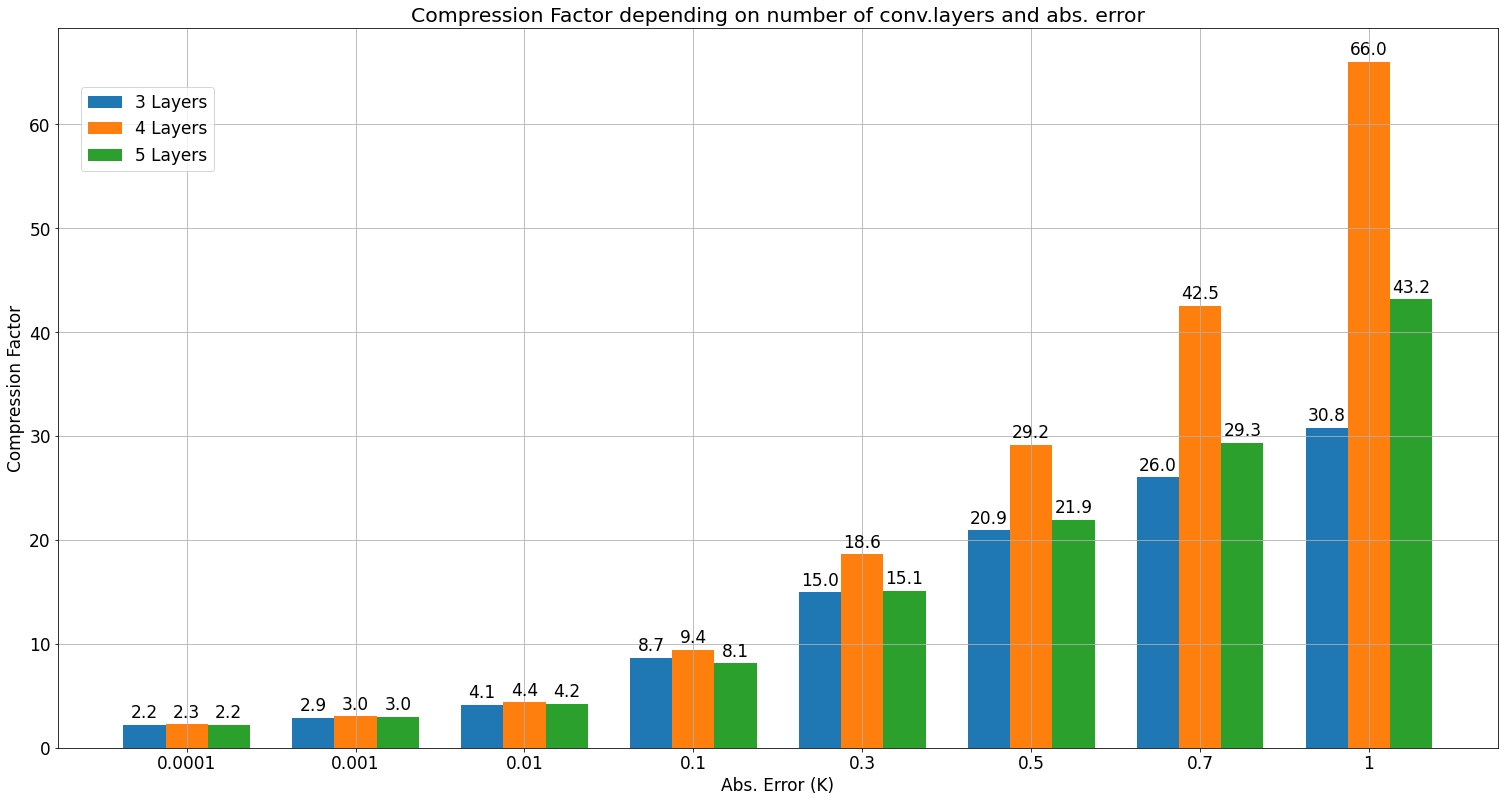

In [19]:
plt.rcParams.update({'font.size': 17})
fig = plt.figure(figsize=(20,10))
cf = np.arange(8)
ax = fig.add_axes([0,0,1,1])
pps = ax.bar(cf - 0.25, cf_3, width = 0.25, label = '3 Layers')
pps1= ax.bar(cf + 0.00, cf_4, width = 0.25, label = '4 Layers')
pps2 = ax.bar(cf + 0.25, cf_5, width = 0.25, label = '5 Layers')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:8] = ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1']
width = 0.25
for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
for p in pps1:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom') 
    
for p in pps2:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
ax.set_xticklabels(labels)
fig.legend(bbox_to_anchor=(0.01, 1.03, 1, -0.1), loc=2,
           ncol=1)
plt.grid()
plt.xlabel('Abs. Error (K)')
plt.ylabel('Compression Factor')
plt.title('Compression Factor depending on number of conv.layers and abs. error')

## Compression of data only using bzip2

In [11]:
import bz2
import xarray as xr
data_or = xr.open_mfdataset('/p/home/jusers/donayreholtz1/hdfml/MyProjects/PROJECT_haf/data/ECMWF/1980/*/temperature.nc', combine='by_coords')
data_or = data_or.sel(time=slice('1980-03-11T01:00:00','1980-03-12T8:00:00'), level = slice(985,1000))
data_or = data_or.transpose('time', 'latitude', 'longitude', 'level')
data_or = data_or.t.values

compress = bz2.compress(data_or)

print("Compression factor Bzip2:", data_or.nbytes/ len(compress))

Compression factor Bzip2: 2.6688111720994727


# Comparison latitude, longitude and land-sea mask as extra information

## Comparing Training and Validation loses.

In [20]:
with open('../../results/FINAL_2/model_basic_3/model-history.pkl', 'rb') as f:
    data = pickle.load(f)
basic_loss = data['model']['loss']
basic_val_loss = data['model']['val_loss']


In [21]:
with open('../../results/FINAL_2/model_extra_3/model-history.pkl', 'rb') as f:
    data = pickle.load(f)
latlon_loss = data['model']['loss']
latlon_val_loss = data['model']['val_loss']

In [22]:
with open('../../results/FINAL_2/model_soil_3/model-history.pkl', 'rb') as f:
    data = pickle.load(f)
soil_loss = data['model']['loss']
soil_val_loss = data['model']['val_loss']

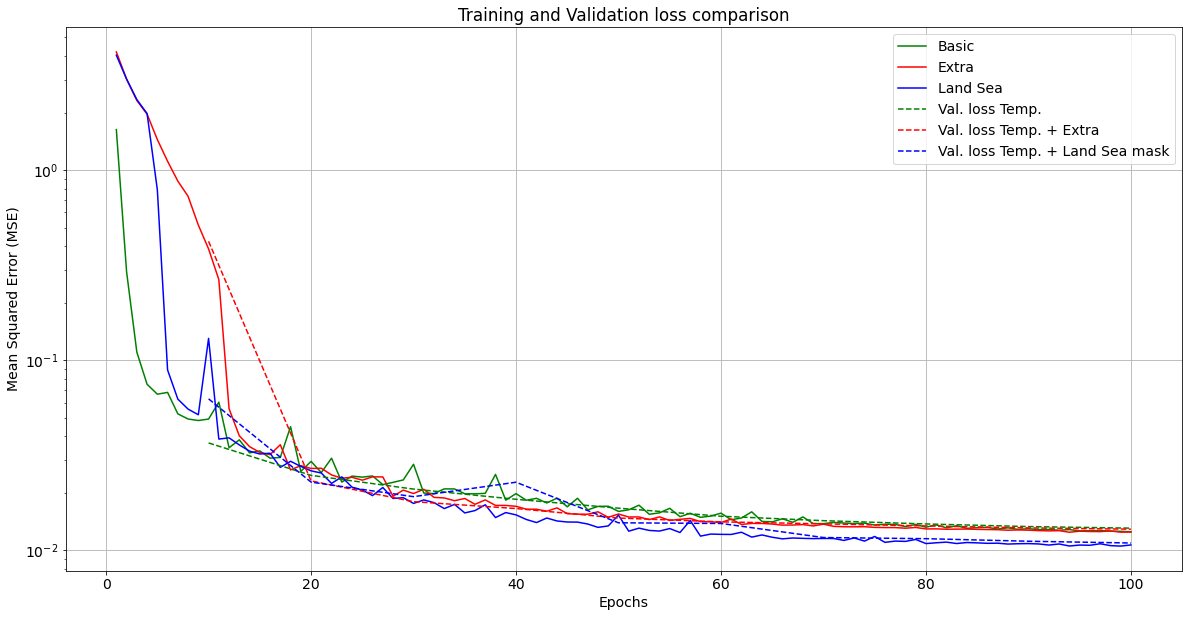

In [23]:

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
epochs = range(1,len(basic_loss)+1)
# Loss
plt.plot(epochs, basic_loss, 'g', label = "Basic")
plt.plot(epochs, latlon_loss, 'r', label = "Extra")
plt.plot(epochs, soil_loss, 'b', label = "Land Sea")
epochs = range(10,len(basic_loss)+10, len(basic_val_loss))
# Validation Loss
plt.plot(epochs, basic_val_loss, '--g', label = "Val. loss Temp.")
plt.plot(epochs, latlon_val_loss, '--r', label = "Val. loss Temp. + Extra")
plt.plot(epochs, soil_val_loss, '--b', label = "Val. loss Temp. + Land Sea mask")

plt.yscale('log')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation loss comparison')
plt.legend()

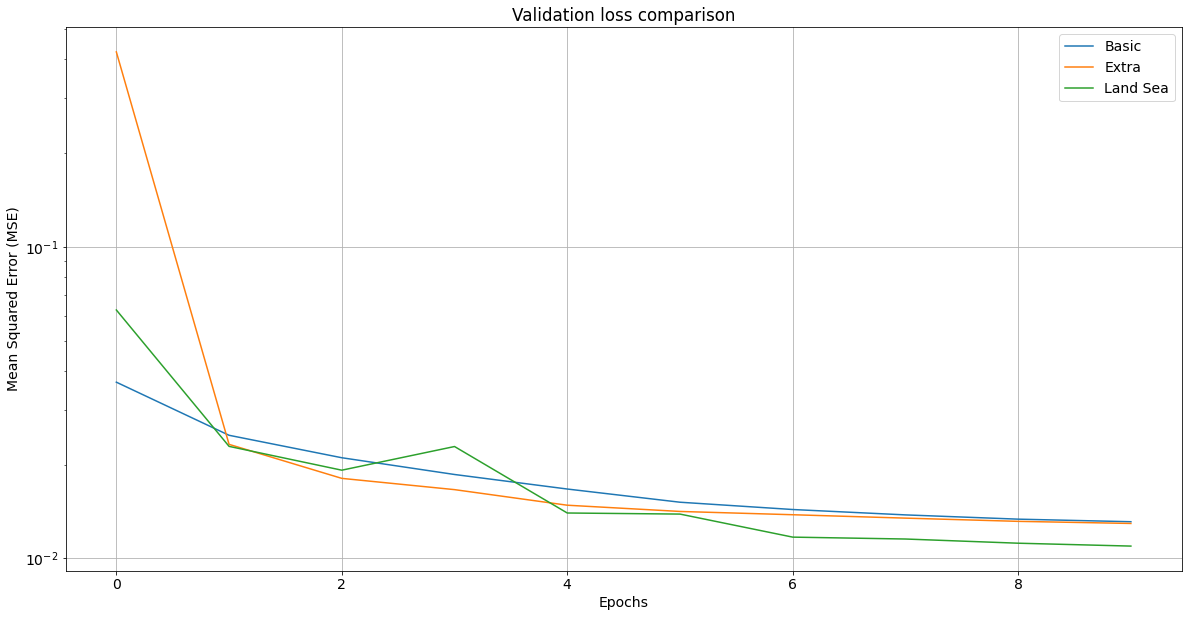

In [24]:
plt.figure(figsize=(20,10))

epochs = range(len(basic_val_loss))
plt.plot(epochs, basic_val_loss, label = "Basic")
plt.plot(epochs, latlon_val_loss, label = "Extra")
plt.plot(epochs, soil_val_loss, label = "Land Sea")
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation loss comparison')
plt.grid()
plt.legend()

## Comparing the compression factor gotten with the 3 models

In [25]:
with open('../../results/FINAL_2/CF_conv_modes_3.pkl', 'rb') as f:
    data = pickle.load(f)

In [26]:
cf_basic = [] 
cf_soil = []
cf_extra = []
cf_gauss = []
cf_std_basic = [] 
cf_std_soil = []
cf_std_extra = []
cf_std_gauss = []

for i in data['conv_basic'].keys():
    cf_basic.append(np.mean(data['conv_basic'][i]))
    cf_soil.append(np.mean(data['conv_soil'][i]))
    cf_extra.append(np.mean(data['conv_extra'][i]))
    #cf_gauss.append(np.mean(data['conv_gauss'][i]))
    #std
    cf_std_basic.append(np.std(data['conv_basic'][i]))
    cf_std_soil.append(np.std(data['conv_soil'][i]))
    cf_std_extra.append(np.std(data['conv_extra'][i]))
    #cf_std_gauss.append(np.std(data['conv_gauss'][i]))

<ipython-input-27-463fb5c88de1>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Compression Factor depeding on extra info  of layers and abs. error')

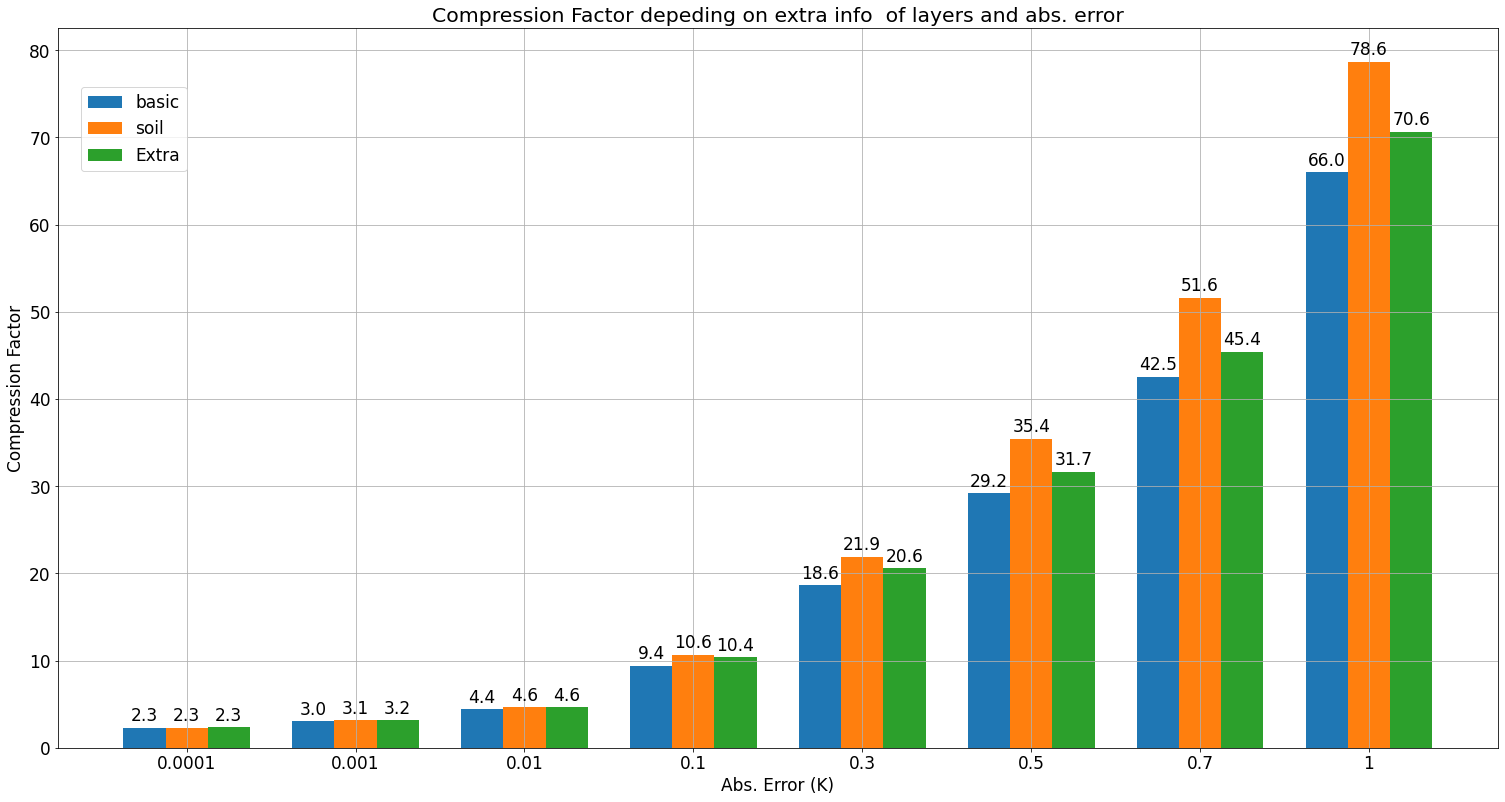

In [27]:
plt.rcParams.update({'font.size': 17})
fig = plt.figure(figsize=(20,10))
cf = np.arange(8)
ax = fig.add_axes([0,0,1,1])
pps = ax.bar(cf - 0.25, cf_basic, width = 0.25, label = 'basic')
pps1= ax.bar(cf + 0.00, cf_soil, width = 0.25, label = 'soil')
pps2 = ax.bar(cf + 0.25, cf_extra, width = 0.25, label = 'Extra')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1:8] = ['0.0001', '0.001', '0.01', '0.1', '0.3', '0.5', '0.7', '1']
width = 0.25
for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
    
for p in pps1:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom') 
    
for p in pps2:
    height = p.get_height()
    ax.annotate('{}'.format(round(height,1)),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
ax.set_xticklabels(labels)
fig.legend(bbox_to_anchor=(0.01, 1.03, 1, -0.1), loc=2,
           ncol=1)
plt.grid()
plt.xlabel('Abs. Error (K)')
plt.ylabel('Compression Factor')
plt.title('Compression Factor depeding on extra info  of layers and abs. error')